# Baseline Model based on U-Net - Trained on Azure

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

if 'notebooks' in os.getcwd():
    os.chdir("..")

print(os.getcwd())

/Users/jh/ai/courses/stanford/3-ML_RL/final_project/xcs229ii_final_project/code


## Load Model Weights From Azure Instance

### Experiment 01 - VGG, No-Pretrained Weights

Experiments based on [experiment list](https://docs.google.com/spreadsheets/d/1bsp8puoiK3ay0rUYdjFXcbxXf6iSJZenIWtoiWczlBA/edit#gid=1999600204https://docs.google.com/spreadsheets/d/1bsp8puoiK3ay0rUYdjFXcbxXf6iSJZenIWtoiWczlBA/edit#gid=1999600204).

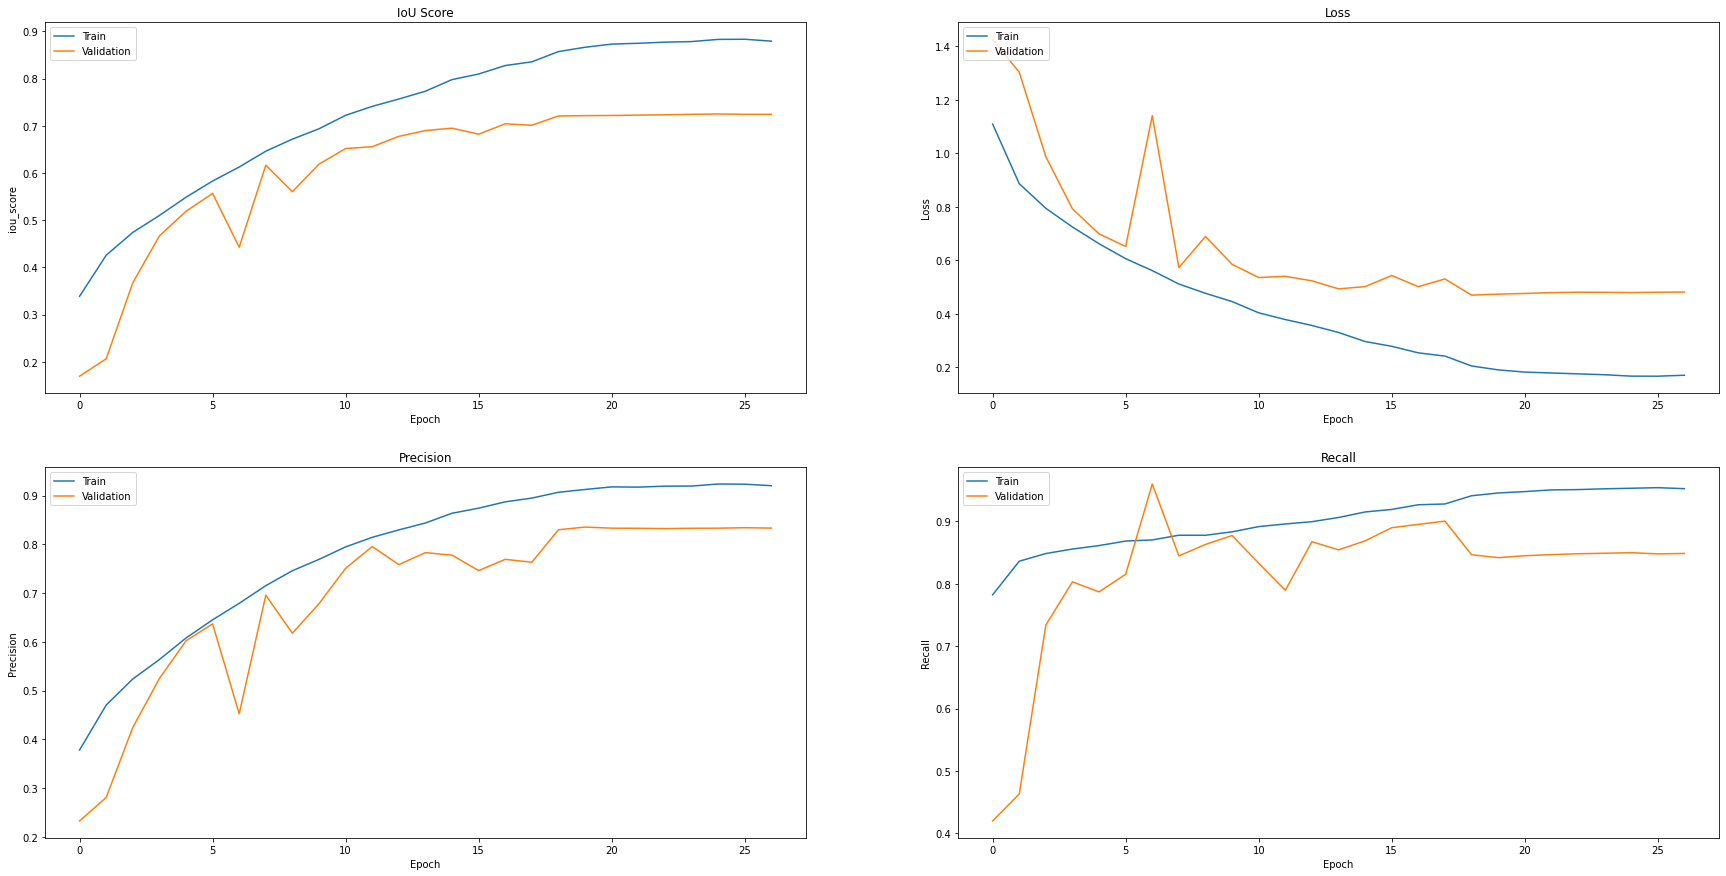

In [5]:
from utils.helper import Visualisation
import pickle
import os
from constants import EXPORT_DIR

AZURE_PATH = os.path.join(EXPORT_DIR, "azure", "2021_05_14_2245", "baseline")

azure_hitory_path = os.path.join(AZURE_PATH, "baseline_01_train_history.pkl")
azure_history = pickle.load(open(azure_hitory_path, "rb"))
Visualisation().plot_curves(azure_history)

#### Test Images (Unseen)

In [6]:
from baseline.trainer import Trainer
import segmentation_models as sm

azure_model = sm.Unet(encoder_weights=None, activation='sigmoid')
azure_model.load_weights(os.path.join(AZURE_PATH, "baseline_01_weights_only.h5"))
trainer = Trainer(model=azure_model)

In [7]:
from constants import TEST_DIR
from utils.helper import NotebookHelper

test_images, test_masks = NotebookHelper().load_images(TEST_DIR, load_masks=True, resize_to=(256, 256), size=5)

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)
Mask shape: (256, 256, 1)


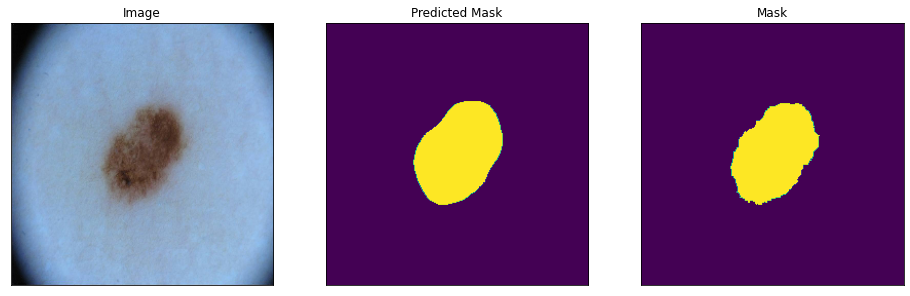

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)
Mask shape: (256, 256, 1)


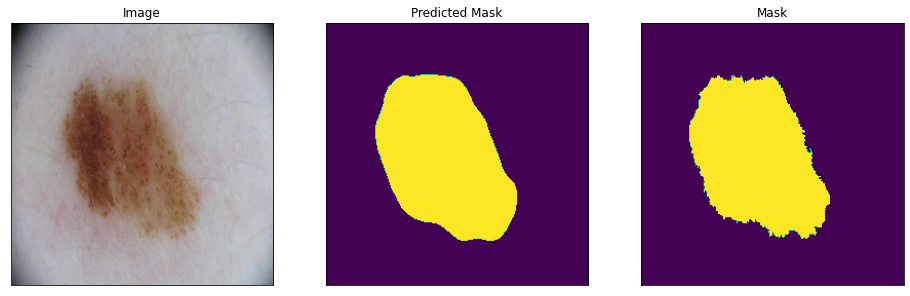

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)
Mask shape: (256, 256, 1)


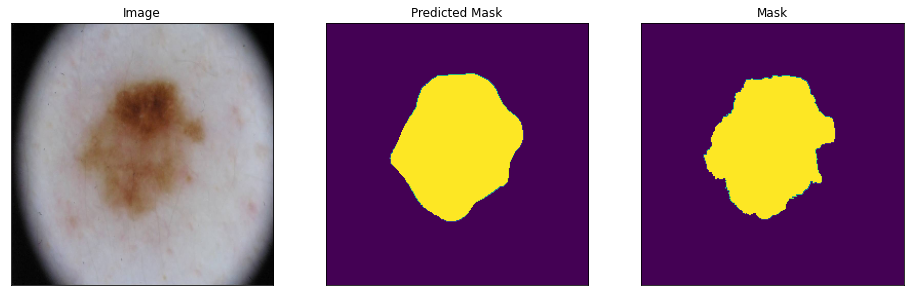

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)
Mask shape: (256, 256, 1)


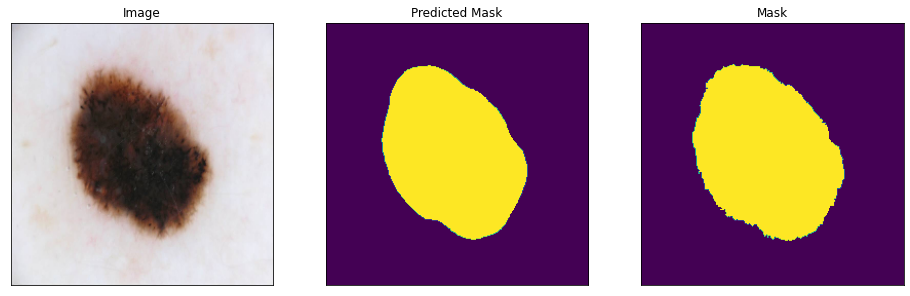

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)
Mask shape: (256, 256, 1)


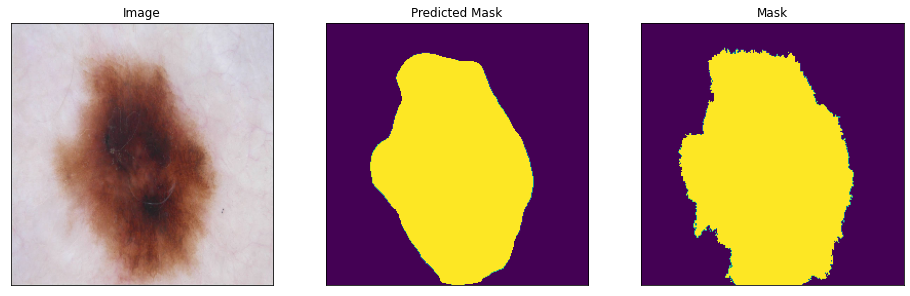

In [8]:
NotebookHelper().plot_images_masks(azure_model, test_images, test_masks)

### Calculate Metrics

This metric calculation is based on the [umetrics library](https://github.com/quantumjot/unet_segmentation_metrics).

The calculation uses the jaccard index threshold from the dataset description [landing page](https://challenge2018.isic-archive.com/task1/), section `metrics`, which is `0.65`.

In [9]:
from constants import TEST_DIR
from utils.helper import NotebookHelper

test_images, test_masks = NotebookHelper().load_images(TEST_DIR, load_masks=True, resize_to=(256, 256))

In [10]:
predicted_masks_list = []

for test_image in test_images:
    test_image = np.expand_dims(test_image, axis=0)
    predicted_mask = azure_model.predict(test_image).round().squeeze(axis=0)
    predicted_masks_list.append(predicted_mask)
    
predicted_masks = np.stack(predicted_masks_list)

assert predicted_masks.shape == (len(test_masks), 256, 256, 1)

In [11]:
%%time

from utils.metrics import Metrics

metrics = Metrics().calculate_batch(
    masks=test_masks,
    predicted_masks=predicted_masks
)

metrics

CPU times: user 1min 2s, sys: 610 ms, total: 1min 2s
Wall time: 1min 3s


{'n_images': 300,
 'n_true_positives': 3972543,
 'n_true_negatives': 14734098,
 'n_false_positives': 380964,
 'n_false_negatives': 573195,
 'iou_score': 0.7982101829792376,
 'threshold_jaccard_index': 0.7327762076308025,
 'jaccard_similarity_index': 0.7982101829792376,
 'dice': 0.8751229753572922,
 'f1_score': 0.4375614876786461,
 'sensitivity': 0.8951349209025459,
 'specificity': 0.9699186495283929,
 'accuracy': 0.9514689636230469}

#### Full Image Resolution Metrics

In [ ]:
from constants import TEST_DIR

test_images, test_masks = load_images(TEST_DIR, load_masks=True)

In [10]:
predicted_masks_list = []

for test_image in test_images:
    test_image = np.expand_dims(test_image, axis=0)
    predicted_mask = azure_model.predict(test_image).round().squeeze(axis=0)
    predicted_masks_list.append(predicted_mask)
    
predicted_masks = np.stack(predicted_masks_list)

assert len(predicted_masks.shape) == len(test_masks)
assert predicted_masks.shape[-1] == 1

In [11]:
%%time

from utils.metrics import Metrics

metrics = Metrics().calculate_batch(
    masks=test_masks,
    predicted_masks=predicted_masks
)

metrics

CPU times: user 1min 2s, sys: 610 ms, total: 1min 2s
Wall time: 1min 3s


{'n_images': 300,
 'n_true_positives': 3972543,
 'n_true_negatives': 14734098,
 'n_false_positives': 380964,
 'n_false_negatives': 573195,
 'iou_score': 0.7982101829792376,
 'threshold_jaccard_index': 0.7327762076308025,
 'jaccard_similarity_index': 0.7982101829792376,
 'dice': 0.8751229753572922,
 'f1_score': 0.4375614876786461,
 'sensitivity': 0.8951349209025459,
 'specificity': 0.9699186495283929,
 'accuracy': 0.9514689636230469}

### Experiment 02 - VGG, ImageNet Weights

Experiments based on [experiment list](https://docs.google.com/spreadsheets/d/1bsp8puoiK3ay0rUYdjFXcbxXf6iSJZenIWtoiWczlBA/edit#gid=1999600204https://docs.google.com/spreadsheets/d/1bsp8puoiK3ay0rUYdjFXcbxXf6iSJZenIWtoiWczlBA/edit#gid=1999600204).

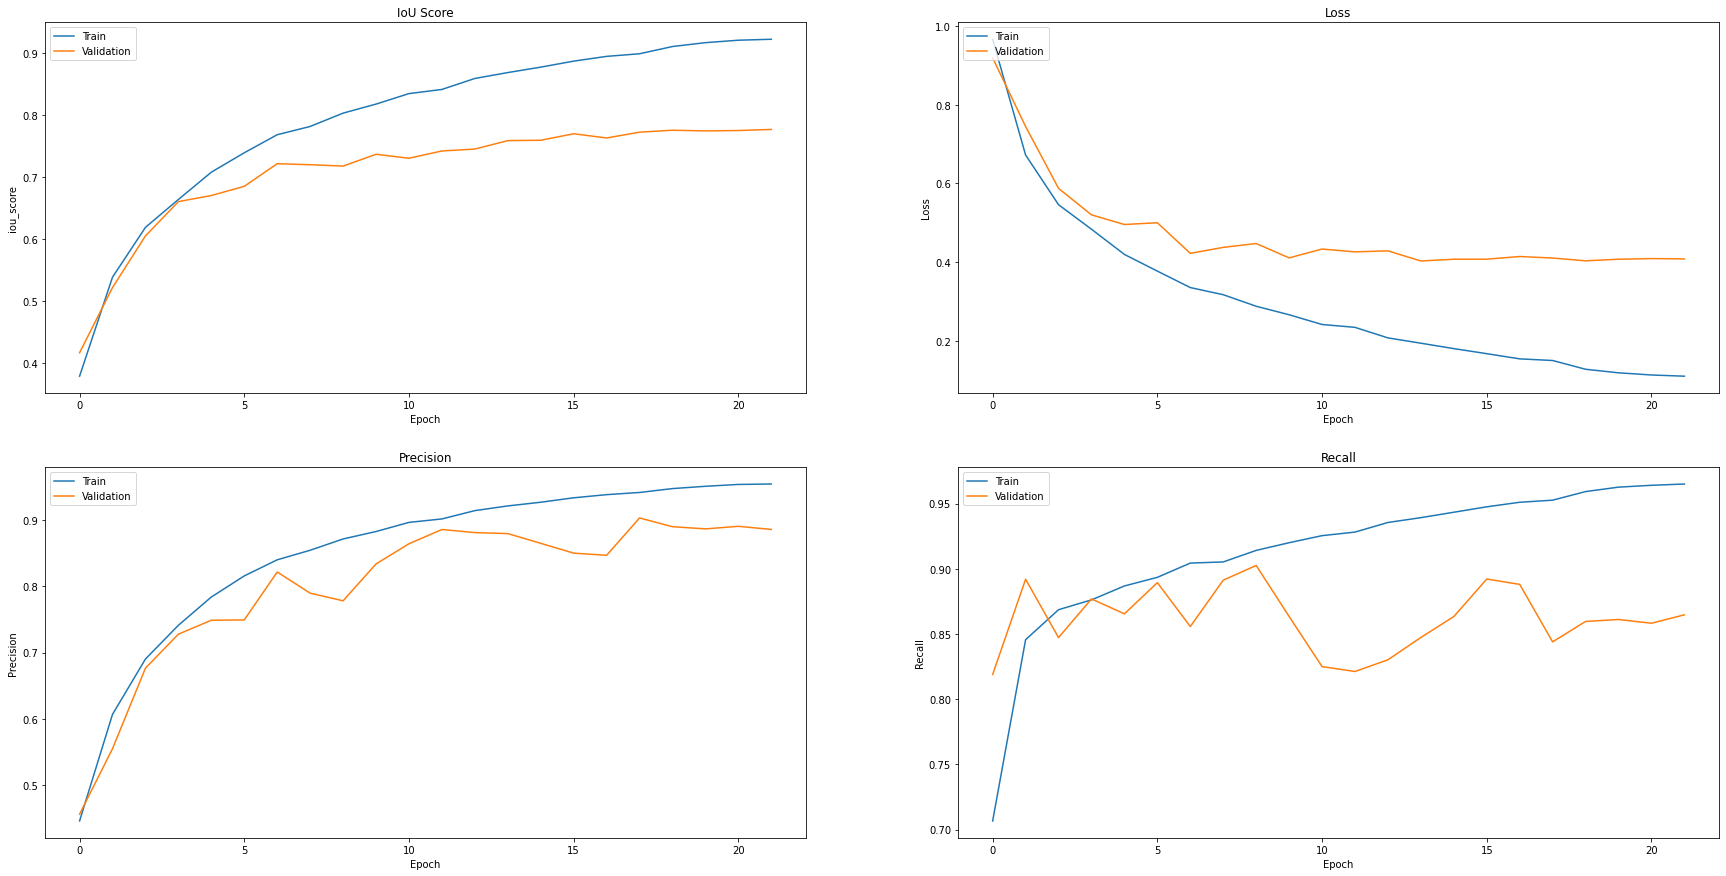

In [12]:
from utils.helper import Visualisation
import pickle
import os
from constants import EXPORT_DIR

AZURE_PATH = os.path.join(EXPORT_DIR, "azure", "2021_05_14_2245", "baseline")

azure_hitory_path = os.path.join(AZURE_PATH, "baseline_02_train_history.pkl")
azure_history = pickle.load(open(azure_hitory_path, "rb"))
Visualisation().plot_curves(azure_history)

#### Test Images (Unseen)

In [13]:
from baseline.trainer import Trainer
import segmentation_models as sm

azure_model = sm.Unet(encoder_weights='imagenet', activation='sigmoid')
azure_model.load_weights(os.path.join(AZURE_PATH, "baseline_02_weights_only.h5"))
trainer = Trainer(model=azure_model)

In [14]:
from constants import TEST_DIR

test_images, test_masks = load_images(TEST_DIR, load_masks=True, resize_to=(256, 256), size=5)

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)
Mask shape: (256, 256, 1)


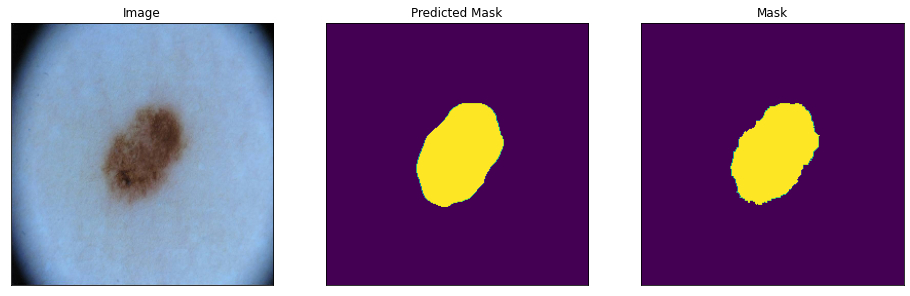

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)
Mask shape: (256, 256, 1)


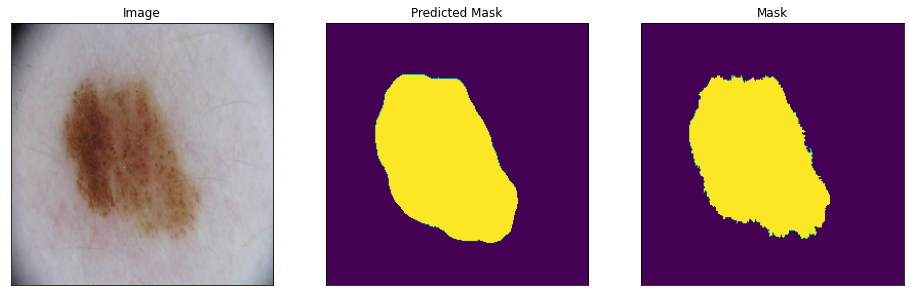

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)
Mask shape: (256, 256, 1)


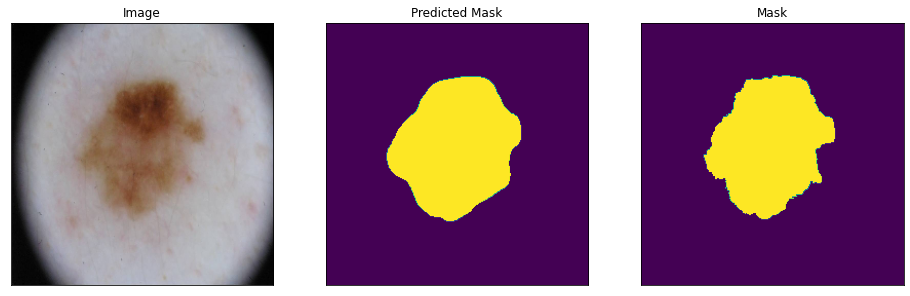

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)
Mask shape: (256, 256, 1)


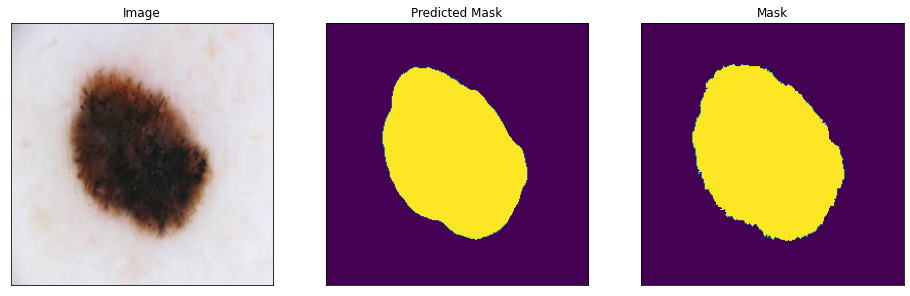

Image shape: (1, 256, 256, 3)
Predicted mask shape: (1, 256, 256, 1)
Mask shape: (256, 256, 1)


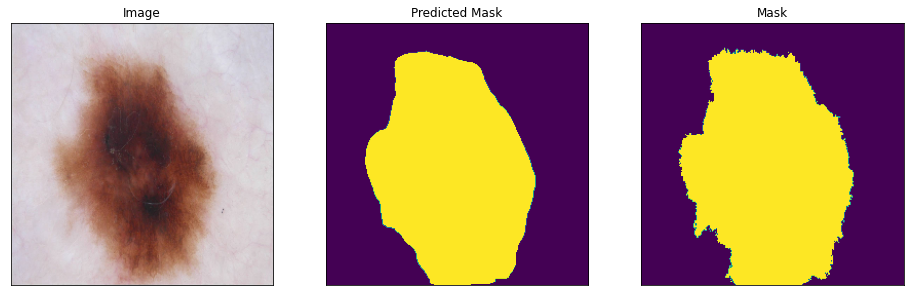

In [15]:
plot_images_masks(azure_model, test_images, test_masks)

### Calculate Metrics

This metric calculation is inspired on the [umetrics library](https://github.com/quantumjot/unet_segmentation_metrics).

The calculation uses the jaccard index threshold from the dataset description [landing page](https://challenge2018.isic-archive.com/task1/), section `metrics`, which is `0.65`.

In [16]:
from constants import TEST_DIR

test_images, test_masks = load_images(TEST_DIR, load_masks=True, resize_to=(256, 256))

In [17]:
predicted_masks_list = []

for test_image in test_images:
    test_image = np.expand_dims(test_image, axis=0)
    predicted_mask = azure_model.predict(test_image).round().squeeze(axis=0)
    predicted_masks_list.append(predicted_mask)
    
predicted_masks = np.stack(predicted_masks_list)

assert predicted_masks.shape == (len(test_masks), 256, 256, 1)

In [18]:
%%time

from utils.metrics import Metrics

metrics = Metrics().calculate_batch(
    masks=test_masks,
    predicted_masks=predicted_masks
)

metrics

CPU times: user 1min 2s, sys: 560 ms, total: 1min 3s
Wall time: 1min 4s


{'n_images': 300,
 'n_true_positives': 4018151,
 'n_true_negatives': 14771805,
 'n_false_positives': 343257,
 'n_false_negatives': 527587,
 'iou_score': 0.8159690838625107,
 'threshold_jaccard_index': 0.7465586309423683,
 'jaccard_similarity_index': 0.8159690838625107,
 'dice': 0.8875522688192267,
 'f1_score': 0.44377613440961333,
 'sensitivity': 0.8844278809835086,
 'specificity': 0.9703067869420772,
 'accuracy': 0.9557065836588542}

#### Full Image Resolution Metrics